In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
  
import warnings
warnings.filterwarnings('ignore')
  
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
  
import os
import matplotlib.image as mpimg

In [3]:
data_path='dataset_cat_dog'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))


print(label_dict)
print(categories)
print(labels)

{'cats': 0, 'dogs': 1}
['cats', 'dogs']
[0, 1]


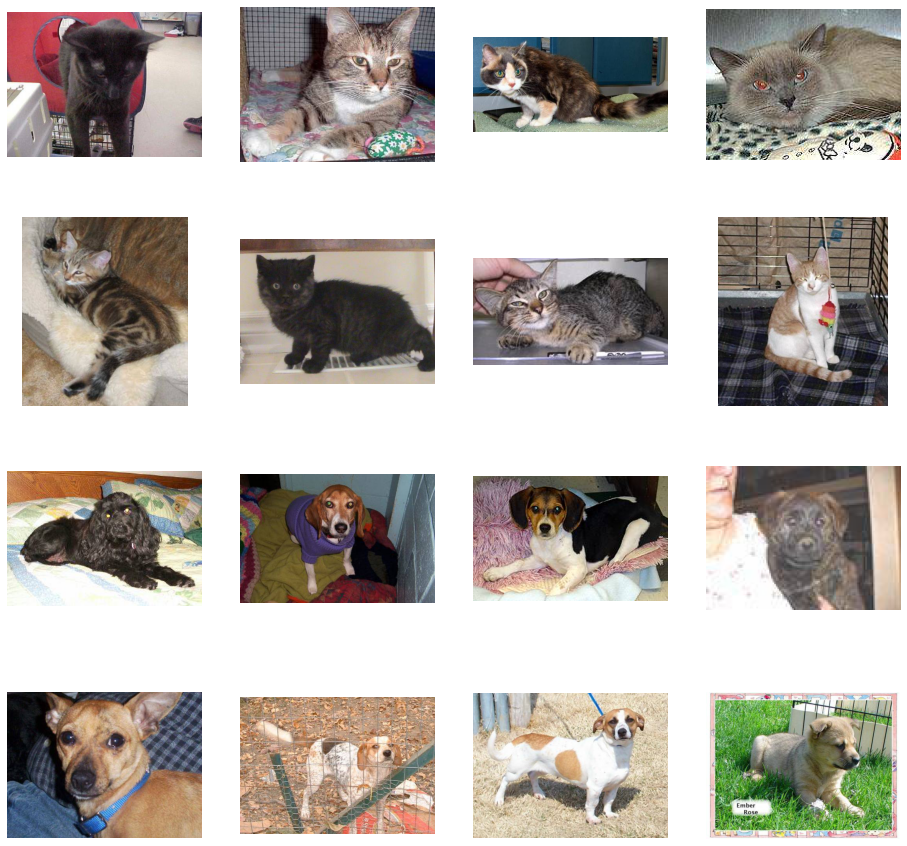

In [4]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dataset_cat_dog/cats')
dog_dir = os.path.join('dataset_cat_dog/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [56]:
base_dir = 'dataset_cat_dog'
  
# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(300,300),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(300,300),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)


Found 838 files belonging to 2 classes.
Using 755 files for training.
Found 838 files belonging to 2 classes.
Using 83 files for validation.


In [57]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
  
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 35, 64)      

In [59]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [60]:
history = model.fit(train_datagen,
          epochs=15,
          validation_data=test_datagen)

Epoch 1/15
24/24 [==============================] - 154s 6s/step - loss: 0.8789 - accuracy: 0.5629 - val_loss: 7.3656 - val_accuracy: 0.3012
Epoch 2/15
24/24 [==============================] - 134s 6s/step - loss: 0.7774 - accuracy: 0.6265 - val_loss: 0.6118 - val_accuracy: 0.7470
Epoch 3/15
24/24 [==============================] - 121s 5s/step - loss: 0.6384 - accuracy: 0.6742 - val_loss: 0.9103 - val_accuracy: 0.6747
Epoch 4/15
24/24 [==============================] - 121s 5s/step - loss: 0.5237 - accuracy: 0.7417 - val_loss: 0.6409 - val_accuracy: 0.6627
Epoch 5/15
24/24 [==============================] - 113s 5s/step - loss: 0.4278 - accuracy: 0.8172 - val_loss: 1.1785 - val_accuracy: 0.6988
Epoch 6/15
24/24 [==============================] - 113s 5s/step - loss: 0.3767 - accuracy: 0.8344 - val_loss: 1.1238 - val_accuracy: 0.6988
Epoch 7/15
24/24 [==============================] - 116s 5s/step - loss: 0.3339 - accuracy: 0.8503 - val_loss: 1.8637 - val_accuracy: 0.6867
Epoch 8/15
24

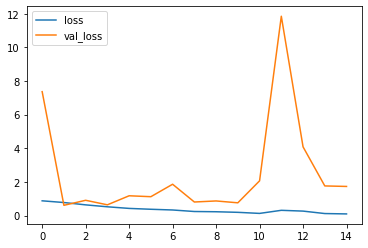

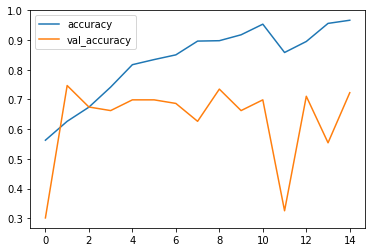

In [61]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 75ms/step
Kucing


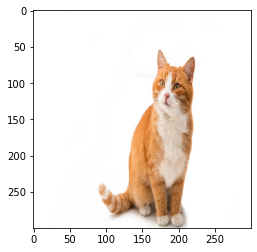

In [77]:
import keras.utils as image
  
#Input image
test_image = image.load_img('kucing.jpg',target_size=(300,300))
  
#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
  
# Result array
result = model.predict(test_image)
  
#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Anjing")
else:
  print("Kucing")

1/1 [==============================] - 0s 72ms/step
Anjing


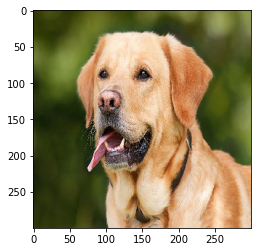

In [78]:
import keras.utils as image

test_image = image.load_img('anjing.jpeg', target_size=(300, 300))
  
# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
  
# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
    print("Anjing")
else:
    print("Kucing")